<a href="https://colab.research.google.com/github/Mithunlavanyaraj/-Implementation-of-Logistic-Regression-Using-Gradient-Descent/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.0 MB/s eta 0:00:00


In [2]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import hashlib
import time
import json
import pandas as pd

# Function to perform AES encryption
def AES_encrypt(plaintext, key):
    key = key.encode('utf-8')  # Ensure key is in bytes
    cipher = AES.new(key, AES.MODE_CBC)
    plaintext_bytes = json.dumps(plaintext).encode('utf-8')  # Convert data to JSON string and encode
    padded_data = pad(plaintext_bytes, AES.block_size)  # Pad data to AES block size
    encrypted_data = cipher.encrypt(padded_data)
    return cipher.iv, encrypted_data

# Function to perform AES decryption
def AES_decrypt(encrypted_data, key, iv):
    key = key.encode('utf-8')
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher.decrypt(encrypted_data), AES.block_size)
    return json.loads(decrypted_data.decode('utf-8'))

# Function for hashing (using SHA-256)
def hash_data(data):
    data_str = json.dumps(data)  # Convert to JSON string
    hashed_data = hashlib.sha256(data_str.encode('utf-8')).hexdigest()
    return hashed_data

# Load Student Dataset
data = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [20, 21, 19],
    'grade': [3.8, 2.9, 3.2]
})

# Process dataset into labeled grades
data['label'] = data['grade'].apply(lambda x: 'A' if x > 3.5 else ('B' if x > 3 else ('C' if x > 2.5 else 'D')))

# Convert dataset to a dictionary for encryption
student_data = data.to_dict(orient='records')

# AES Encryption
encryption_key = "abcdefghijklmnop"  # 16-byte key
start_time = time.time()
iv, encrypted_student_data = AES_encrypt(student_data, encryption_key)
aes_time = time.time() - start_time

print("Encrypted Student Data (AES):", encrypted_student_data.hex())
print("IV for AES (to decrypt later):", iv.hex())

# AES Decryption for verification
decrypted_data = AES_decrypt(encrypted_student_data, encryption_key, iv)
print("Decrypted Student Data (AES):", decrypted_data)

# Hashing
start_time = time.time()
hashed_student_data = hash_data(student_data)
hash_time = time.time() - start_time

print("Hashed Student Data (Hashing):", hashed_student_data)

# Performance Metrics
print(f"AES Encryption Time: {aes_time:.6f} seconds")
print(f"Hashing Time: {hash_time:.6f} seconds")

# Evaluation Placeholder
print("Evaluation Results (Placeholder):")
print("Accuracy, Precision for AES and Hashing depend on specific use cases.")

Encrypted Student Data (AES): 54c2c0a00aabedb453ac3b7476de808911533da5670492bc24d19ad6c0852b2be3df7ef69c7ad8465c9d6e3da10e9f00e37f6bfa3919fb643600f80e32c9f06b97fb06375fd2984f682f038d07a256e6191f945f99b8ae9031e1cacbd9c7d4590f636fd0deeb600c0ea5bf870d3d1334d9f9d4337d98166e26ab19cdda18624ceff27a81e995727c83fbe172ddfe8e64b1e8ce6ae63284cbc4ea4cdae8606bff2fc50f8d2f1cd2eb618faa1d66b5a0b1
IV for AES (to decrypt later): 09767b465123225308d961a17529f612
Decrypted Student Data (AES): [{'name': 'Alice', 'age': 20, 'grade': 3.8, 'label': 'A'}, {'name': 'Bob', 'age': 21, 'grade': 2.9, 'label': 'C'}, {'name': 'Charlie', 'age': 19, 'grade': 3.2, 'label': 'B'}]
Hashed Student Data (Hashing): 77c42221d6dbbbb5cc56cbf2303e005cd82e2d506c5acc321085aafeb60c6d38
AES Encryption Time: 0.003191 seconds
Hashing Time: 0.000123 seconds
Evaluation Results (Placeholder):
Accuracy, Precision for AES and Hashing depend on specific use cases.


In [4]:
pip install pycryptodome pandas matplotlib numpy

In [5]:
import pandas as pd

# Example student dataset
data = pd.DataFrame({
    'Name': ['Dinesh', 'Srini', 'Raj Kiran', 'Aaron', 'Tharun'],
    'Age': [20, 21, 19, 22, 20],
    'Sex': ['Female', 'Male', 'Male', 'Female', 'Female'],
    'RFID_Number': ['97943607', '02185050', '84823224', '36132854', '46129387']
})

print(data)

        Name  Age     Sex RFID_Number
0     Dinesh   20  Female    97943607
1      Srini   21    Male    02185050
2  Raj Kiran   19    Male    84823224
3      Aaron   22  Female    36132854
4     Tharun   20  Female    46129387


In [6]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import json

def aes_encrypt(data, key):
    key = key.encode('utf-8')  # Convert key to bytes
    cipher = AES.new(key, AES.MODE_CBC)  # AES encryption object
    data_bytes = json.dumps(data).encode('utf-8')  # Convert data to bytes
    padded_data = pad(data_bytes, AES.block_size)  # Pad data
    encrypted_data = cipher.encrypt(padded_data)  # Encrypt
    return cipher.iv, encrypted_data

def aes_decrypt(encrypted_data, key, iv):
    key = key.encode('utf-8')
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher.decrypt(encrypted_data), AES.block_size)
    return json.loads(decrypted_data.decode('utf-8'))

In [7]:
import hashlib

def hash_data(data):
    data_str = json.dumps(data)  # Convert data to string
    hashed_data = hashlib.sha256(data_str.encode('utf-8')).hexdigest()
    return hashed_data

In [8]:
import time

def measure_performance(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

In [9]:
# Encrypt the dataset with AES
(aes_result, aes_time) = measure_performance(aes_encrypt, data.to_dict(orient='records'), encryption_key)

# Unpack the result of AES encryption
iv, encrypted_data = aes_result  # aes_encrypt returns a tuple (iv, encrypted_data)

print("AES Encrypted Data:", encrypted_data)
print("Initialization Vector (IV):", iv)
print("AES Encryption Time:", aes_time)


AES Encrypted Data: b'\x9f\xd2<jc\x07<\xe20\x9f\xa7\xd8\xcd\x15\xb6\x99\x0f\xf6\x16R\xb6\x04g\xd3\xe2\xf5E\t"\xdba=\xa0\x1a#\xe74icZZ\x03\xbf\x8bf\xca\xdcw\xb4\xd1\xa7\xa2\xc3\xa32\xaf\xef\x170\x02\x19\xd1\x0c\xa9^\xb0\xc1\xb2\x1aSx*\x9cN\xde(\xd5\x9e\x95\xc6\x0c\xf9\xa5\xfb\x8d^\xe0\xaf\x05\xd92\xe5h\x0f\xd48l\xdfK\x02\xe5\xb7_\x17\xc7F\xeb7\x88\x07/\xdfH\xac\xbd4\x17y\x95@\xa1\xa9\xa5\x94\x8f\xb5^:\xfa\x8a\xd1~R\x00\xb3#j\x04\xea\xf1\x1d\x97mW\n\xfa9\xe7\xf7\'$\xb0\xefq\x92\xcf\xbd\xd9>\x12\xa5\xcd\xde\\\xffv\x89\xca\xb01\xf1}w\xdc{\xbd\x15\x83\xe9\x15\x11\x16-sw\x10\xe48\xd0\x89|~S\x1fg\xcb42q[q\xa3\xdf!\xe6\xbf\x1d\x90^q`\x84\xb4 \x03f\xf0\x8f>!\xcfFk\xbb\xdcz\x81\x92W\xb7\xa3U\xa1|v\xc1\x0e\xd3r\xd1&\x1fG\x17VK\xf4\xe3h-\xed\x85s\xa6/\x99\x91\x10\x96\xc4\xa5\'5\r\xcc\x9d%\x96\xe2!\xf8\x00\xd4l\xb1\xff\rj\xf4ti\x95O\xd2\xa8\xdf\x9f\x03\xec]\x94\xa0\xd0\xcb\xba\xf6\xfa\xd1|QX\x8fl\xdf\xb2\xe7\x0c\x0fvsffu\xf1C<$\\\xc1\x84\xd3\x0cWW\x1c\xd9\xedbA~\x1f\x01\xb8Kvil0\xd59\xc8\x83wC\x0f\

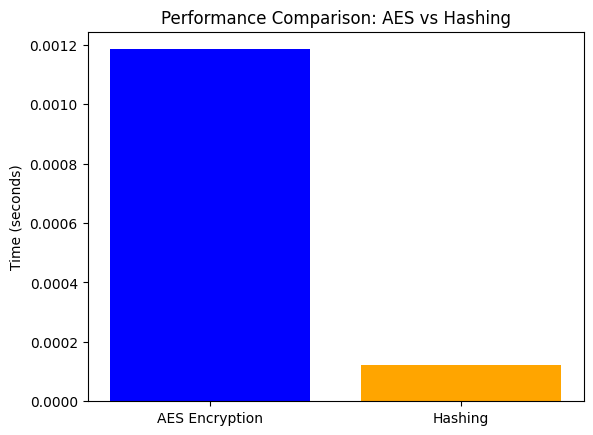

In [10]:
import matplotlib.pyplot as plt

# Visualization
labels = ['AES Encryption', 'Hashing']
times = [aes_time, hash_time]

plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: AES vs Hashing')
plt.show()